In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import imageio
from skimage.color import rgb2gray
from skimage.exposure import histogram
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage import morphology

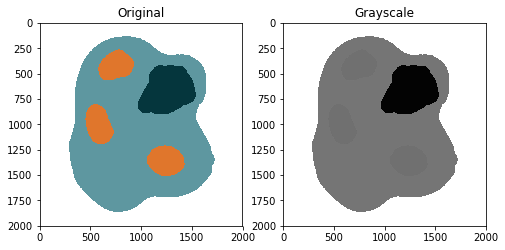

In [2]:
im = imageio.imread('blob1.jpg')
imGray = np.round(rgb2gray(im),3)  

fig, ax = plt.subplots(1, 2, figsize=(8, 4)) 

ax[0].imshow(im)
ax[0].set_title("Original")
ax[1].imshow(imGray, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
plt.show()

Text(0.5, 1.0, 'histogram of gray values')

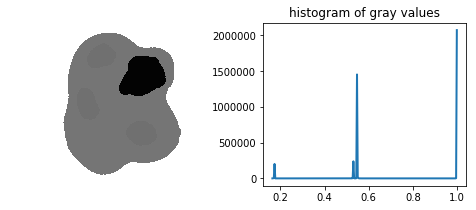

In [3]:
hist, hist_centers = histogram(imGray)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(imGray, cmap=plt.cm.gray, interpolation='nearest')
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

Text(0.5, 0.98, 'Separated in different thresholds')

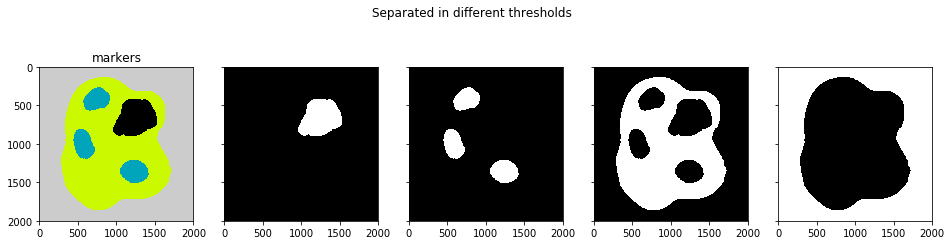

In [4]:
hist_max =  hist_centers[hist>1e5] 
n_thresholds = len(hist_max)
epsilon = 0.01 # tuning parameter 
hist_max_rounded = np.around( hist_max+epsilon,2)
boundaries = np.insert( hist_max_rounded   , 0, epsilon, axis=0)

markers = np.zeros_like(imGray)

fig, axes = plt.subplots(1, n_thresholds + 1, figsize=(16, 4), sharey=True)
for j in range(len(boundaries)-1): 
    in_boundaries = (imGray>=boundaries[j]) &  (imGray<boundaries[j+1])
    axes[j+1].imshow( in_boundaries , cmap=plt.cm.gray, interpolation='nearest')
    markers[in_boundaries] = j + 1 
    
axes[0].imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
axes[0].set_title('markers')
fig.suptitle('Separated in different thresholds')

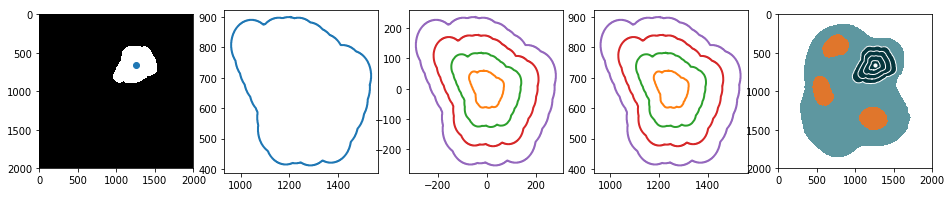

In [65]:
test_blob= np.zeros_like(markers)
test_blob[markers == 1] = 1

# This only works if there is a single blob, so extra code is required to loop this over multiple blobs 

# find x,y locations
XY = np.where( test_blob == 1) 
# find centroid 
centroid = np.mean(XY,1) 
# find contour of blob 
contours = measure.find_contours(test_blob, 0.5)
# set how many subcontours you would like
n_subContour = 4

fig, axes = plt.subplots(1, 5, figsize=(16, 3))
axes[0].imshow(test_blob, cmap=plt.cm.gray, interpolation='nearest') 
axes[0].scatter(centroid[1],centroid[0] )
axes[4].scatter(centroid[1],centroid[0],10 ,color='white')


for n, contour in enumerate(contours):  
    axes[1].plot(contour[:, 1], contour[:, 0], linewidth=2)
    
    contour_centered = np.zeros_like(contour)
    contour_centered[:,0] = contour[:,0] - centroid[0]
    contour_centered[:,1] = contour[:,1] - centroid[1] 

    for j in range(n_subContour+1):
        contour_scaled = contour_centered*j/n_subContour
        axes[2].plot(contour_scaled[:, 1], contour_scaled[:, 0], linewidth=2)
        axes[3].plot(contour_scaled[:, 1]+centroid[1], contour_scaled[:, 0]+centroid[0], linewidth=2)
        axes[4].plot(contour_scaled[:, 1]+centroid[1], contour_scaled[:, 0]+centroid[0], linewidth= 1,color ='w')

axes[4].imshow(im, cmap=plt.cm.gray, interpolation='nearest') 



# -------------------------------------------------

# Everything below here is not working

# -------------------------------------------------


(-0.5, 1999.5, 1999.5, -0.5)

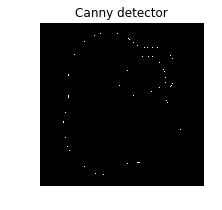

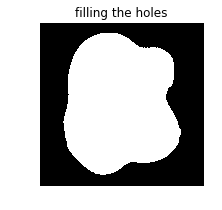

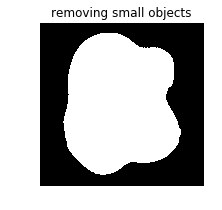

In [6]:
edges = canny(imGray)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Canny detector')
ax.axis('off')

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill_coins, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('filling the holes')
ax.axis('off')


coins_cleaned = morphology.remove_small_objects(fill_coins, 21)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(coins_cleaned, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('removing small objects')
ax.axis('off')

pixels (area) of color 0: 206740
pixels (area) of color 1: 244366
pixels (area) of color 2: 1472125
pixels (area) of color 3: 2076769


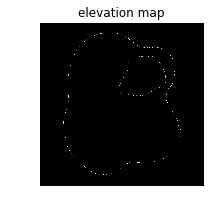

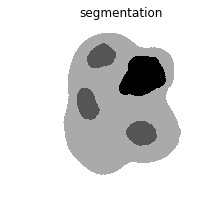

In [7]:
from skimage.filters import sobel

elevation_map = sobel(imGray)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('elevation map')
ax.axis('off')


segmentation = morphology.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('segmentation')
ax.axis('off')
 
    
unique_markers = np.unique( segmentation) 
for j in range( len( unique_markers) ):
    print('pixels (area) of color ' + str(j) + ': '  + str( np.count_nonzero( segmentation == unique_markers[j])  )  ) 

D:\D_program_files\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


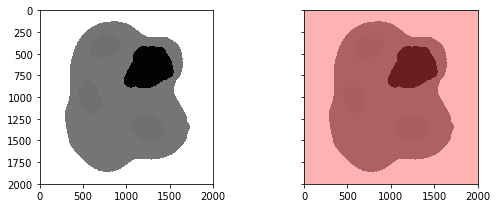

In [8]:
from skimage.color import label2rgb

segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndi.label(segmentation)
image_label_overlay = label2rgb(labeled_coins, image=imGray)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(imGray, cmap=plt.cm.gray, interpolation='nearest')
axes[0].contour(segmentation, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay, interpolation='nearest')
 
 
plt.tight_layout()

plt.show()

TypeError: Invalid dimensions for image data

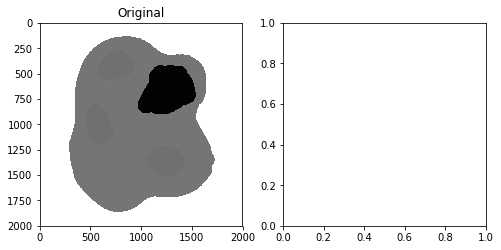

In [9]:
import matplotlib.pyplot as plt

from skimage import measure

# Construct some test data 
common_values=  hist_centers[hist>1e5]  
contours = measure.find_contours(imGray,common_values[2]) 

fig, ax = plt.subplots(1, 2, figsize=(8, 4)) 
ax[0].imshow(imGray, cmap=plt.cm.gray)
ax[0].set_title("Original") 

ax[1].imshow(r, interpolation='nearest', cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax[1].plot(contour[:, 1], contour[:, 0], linewidth=2)
 
plt.show()